In [1]:
#Project 1, Wine Regression
names: ["Burhan", "Gabby Mueller"]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from sklearn import (datasets, metrics,
                     model_selection as skms,
                     linear_model, neighbors, dummy)

In [6]:
# Read in data
wine_original_df = pd.read_csv('wine_train.csv')

display(wine_original_df.info())

features_to_analyze = ['fixed_acidity',
                      'volatile_acidity',
                      'citric_acid',
                      'residual_sugar',
                      'chlorides',
                      'free_sulfur_dioxide',
                      'total_sulfur_dioxide',
                      'density',
                      'pH', 
                      'sulphates',
                      'alcohol',
                       ]

# Separate target from features
wine_tgt = wine_original_df['quality']
wine_ftrs = wine_original_df[features_to_analyze]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3549 entries, 0 to 3548
Data columns (total 13 columns):
id                      3549 non-null int64
fixed_acidity           3549 non-null float64
volatile_acidity        3549 non-null float64
citric_acid             3549 non-null float64
residual_sugar          3549 non-null float64
chlorides               3549 non-null float64
free_sulfur_dioxide     3549 non-null float64
total_sulfur_dioxide    3549 non-null float64
density                 3549 non-null float64
pH                      3549 non-null float64
sulphates               3549 non-null float64
alcohol                 3549 non-null float64
quality                 3549 non-null int64
dtypes: float64(11), int64(2)
memory usage: 360.6 KB


None

In [7]:
#splitting for train,test

(wine_train_p_validation_ftrs, wine_test_ftrs,
wine_train_p_validation_tgt, wine_test_tgt) = skms.train_test_split(wine_ftrs,
                                                                 wine_tgt,
                                                                 test_size=.25)
(wine_train_ftrs, wine_validation_ftrs,
wine_train_tgt, wine_validation_tgt) = skms.train_test_split(wine_train_p_validation_ftrs,
                                                          wine_train_p_validation_tgt,
                                                          test_size=.33)

print(f'Train: {len(wine_train_tgt)/len(wine_original_df):.2f}')
print(f'Validation: {len(wine_validation_tgt)/len(wine_original_df):.2f}')
print(f'Test: {len(wine_test_tgt)/len(wine_original_df):.2f}')

Train: 0.50
Validation: 0.25
Test: 0.25


In [8]:
models = {
    'lr' : linear_model.LinearRegression()
}
for k in range(1,32,2):
    models[f'{k}-NN'] = neighbors.KNeighborsRegressor(n_neighbors=k)
           

Best model: lr; RMSE: 0.74


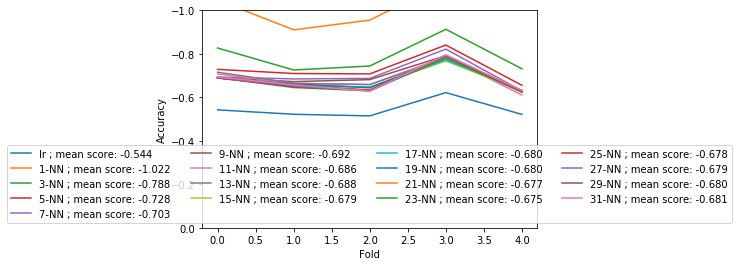

In [11]:
rmses = {}
fig,ax = plt.subplots(figsize=(6,4))
for name, model in models.items():
    cv_scores = skms.cross_val_score(model,
                                    wine_train_ftrs, 
                                    wine_train_tgt,
                                     cv=5,
                                     scoring='neg_mean_squared_error',
                                    )
    rmses[name] = np.sqrt(-cv_scores.mean())
    my_lbl="{} ; mean score: {:.3f}".format(name,cv_scores.mean())
    ax.plot(cv_scores,label=my_lbl)#,marker=next(markers))
    ax.set_ylim(0.0,-1,1)
    ax.set_xlabel('Fold')
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower center', ncol=4);
    
best_model_name = min(rmses,key=rmses.get)
print(f'Best model: {best_model_name}; RMSE: {rmses[best_model_name]:.2f}')

In [10]:
#validate
final_model = models[best_model_name]
fit = final_model.fit(wine_train_ftrs, wine_train_tgt)
pred = fit.predict(wine_validation_ftrs)
rmse = np.sqrt(metrics.mean_squared_error(wine_validation_tgt,pred))
print(f'{best_model_name} RMSE: {rmse:.2f}')

lr RMSE: 0.80
